In [1]:
import matplotlib.pylab as plt 
%matplotlib inline
import numpy as np
import rubin_sim.maf_proto as maf
import pandas as pd
import sqlite3
import healpy as hp
import copy

from rubin_sim.data import get_baseline
from os.path import basename


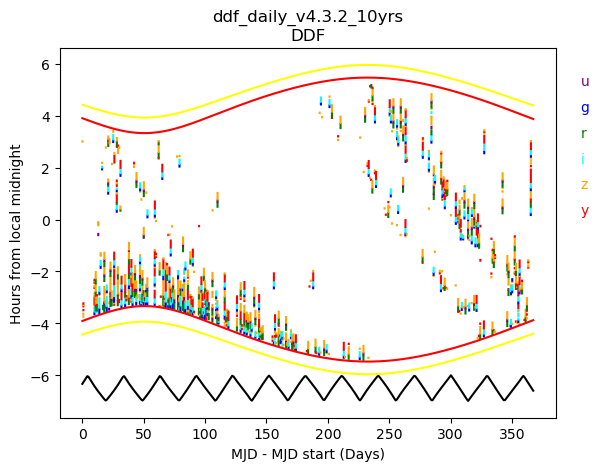

In [2]:
db_file = "ddf_daily_v4.3.2_10yrs.db"
run_name = basename(db_file).replace('.db', '')
con = sqlite3.connect(db_file)
df = pd.read_sql('select * from observations where night <= 365;', con)
con.close()
visits_array = df.to_records(index=False)


# If we want to use some automated label generation 
info = {"run_name": run_name}
ddf_indx = ['DD:' in note for note in visits_array["scheduler_note"]]

sub_data = visits_array[ddf_indx]
info['observations_subset'] = "DDF" 
pm = maf.PlotHourglass(info=info)
fig = pm(sub_data)



Text(0.5, 1.0, 'ddf_daily_v4.3.2_10yrs\nXMM')

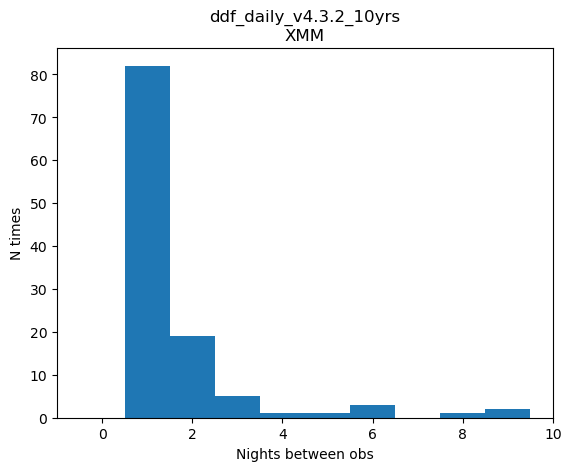

In [3]:
ack = ["XMM" in note for note in visits_array["scheduler_note"]]
xmm_nights = np.unique(visits_array[ack]["night"])
fig, ax = plt.subplots()
_tmp = ax.hist(np.diff(xmm_nights), bins=np.arange(11)-0.5)
ax.set_xlabel("Nights between obs")
ax.set_ylabel("N times")
ax.set_title(run_name + "\nXMM")

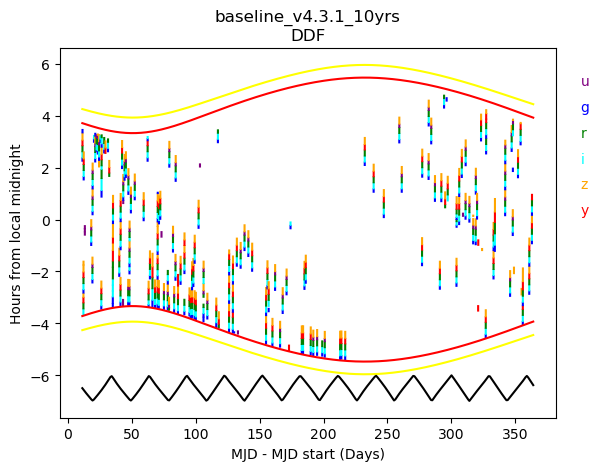

In [4]:

db_file = get_baseline()
run_name = basename(db_file).replace('.db', '')
con = sqlite3.connect(db_file)
df = pd.read_sql('select * from observations where night <= 365;', con)
con.close()
visits_array = df.to_records(index=False)


# If we want to use some automated label generation 
info = {"run_name": run_name}
ddf_indx = ['DD:' in note for note in visits_array["scheduler_note"]]

sub_data = visits_array[ddf_indx]
info['observations_subset'] = "DDF" 
pm = maf.PlotHourglass(info=info)
fig = pm(sub_data)


Text(0.5, 1.0, 'baseline_v4.3.1_10yrs\nXMM')

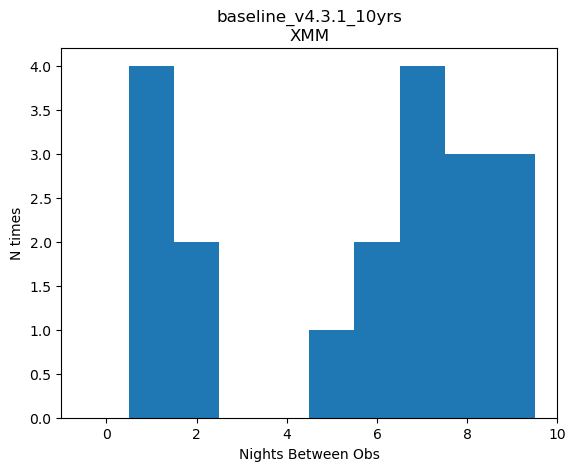

In [5]:
ack = ["XMM" in note for note in visits_array["scheduler_note"]]
xmm_nights = np.unique(visits_array[ack]["night"])
fig, ax = plt.subplots()
_tmp = ax.hist(np.diff(xmm_nights), bins=np.arange(11)-0.5)
ax.set_xlabel("Nights Between Obs")
ax.set_ylabel("N times")
ax.set_title(run_name + "\nXMM")